

# Data Science & Business Analytics intern at The Sparks Foundation

# Task -3 :Exploratory Data Analysis - Retail

## Author : Alok Yadav

In [1]:
# Importing the libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
# import data set
df = pd.read_csv("C:/Users/Acer/Downloads/SampleSuperstore.csv")

In [19]:
df.head()

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,22.3680,2,0.20,2.5164


In [20]:
df.shape


(9994, 13)

In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Ship Mode     9994 non-null   object 
 1   Segment       9994 non-null   object 
 2   Country       9994 non-null   object 
 3   City          9994 non-null   object 
 4   State         9994 non-null   object 
 5   Postal Code   9994 non-null   int64  
 6   Region        9994 non-null   object 
 7   Category      9994 non-null   object 
 8   Sub-Category  9994 non-null   object 
 9   Sales         9994 non-null   float64
 10  Quantity      9994 non-null   int64  
 11  Discount      9994 non-null   float64
 12  Profit        9994 non-null   float64
dtypes: float64(3), int64(2), object(8)
memory usage: 1015.1+ KB


In [22]:
df.describe()

,Postal Code,Sales,Quantity,Discount,Profit
count,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000
mean,55190.379428,229.858001,3.789574,0.156203,28.656896
std,32063.693350,623.245101,2.225110,0.206452,234.260108
min,1040.000000,0.444000,1.000000,0.000000,-6599.978000
25%,23223.000000,17.280000,2.000000,0.000000,1.728750
50%,56430.500000,54.490000,3.000000,0.200000,8.666500
75%,90008.000000,209.940000,5.000000,0.200000,29.364000
max,99301.000000,22638.480000,14.000000,0.800000,8399.976000


## Data cleaning

### Checking null values

In [23]:
df.isnull().head().sum()

Ship Mode       0
Segment         0
Country         0
City            0
State           0
Postal Code     0
Region          0
Category        0
Sub-Category    0
Sales           0
Quantity        0
Discount        0
Profit          0
dtype: int64

### check the duplicate values in data

In [4]:
df.duplicated().sum()

17

## droping duplicates values in data

In [27]:
df.drop_duplicates(inplace=True)

In [28]:
# number of countries in which business run
df.Country.nunique()

1

### As we can see above all data is of one country so we don't need counry column

### Also the postal code column as it is a qualitative variable but it seems quantitative in nature so i will drop that as well

In [5]:
df.drop(['Country','Postal Code'],axis=1,inplace=True)

In [6]:
df.head(5)

,Ship Mode,Segment,City,State,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,Henderson,Kentucky,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,Henderson,Kentucky,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,Los Angeles,California,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,Fort Lauderdale,Florida,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,Fort Lauderdale,Florida,South,Office Supplies,Storage,22.3680,2,0.20,2.5164


In [32]:
# getting dimension of data
df.shape

(9977, 11)

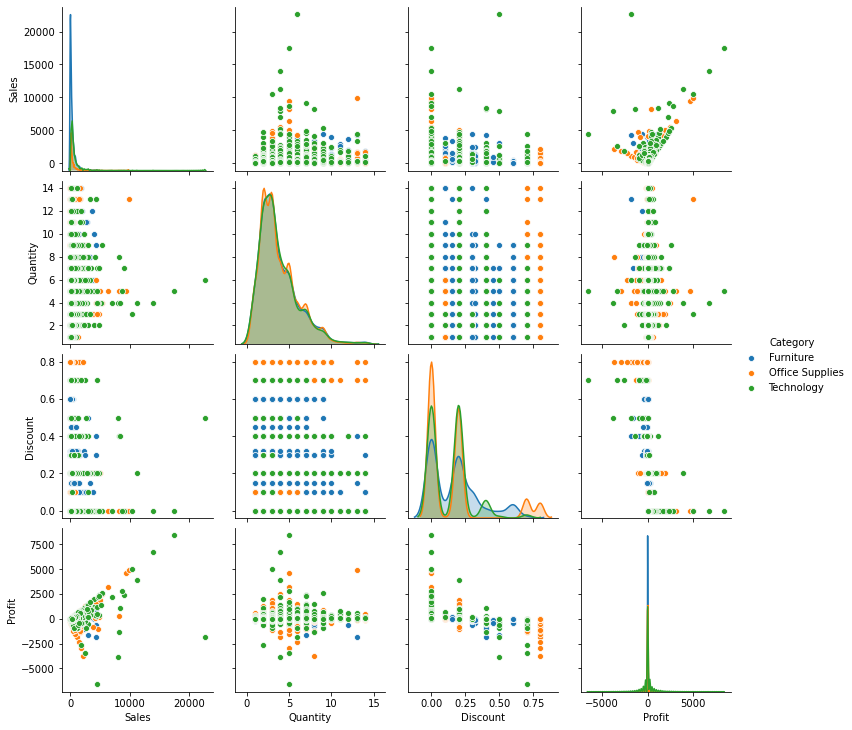

In [35]:
sns.pairplot(df,hue="Category")

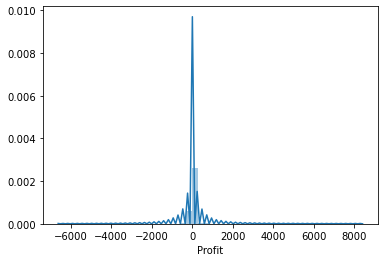

In [39]:
sns.distplot(df["Profit"])

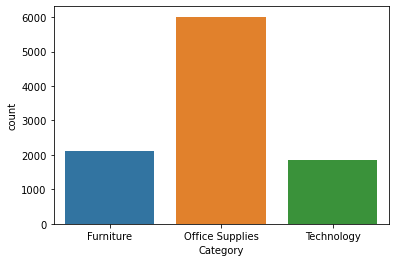

In [40]:
sns.countplot(df["Category"])

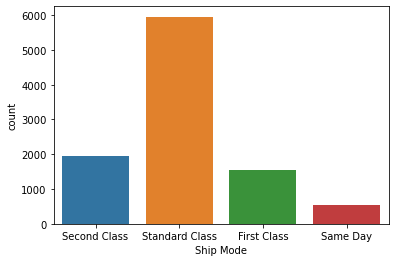

In [55]:
sns.countplot(df["Ship Mode"])

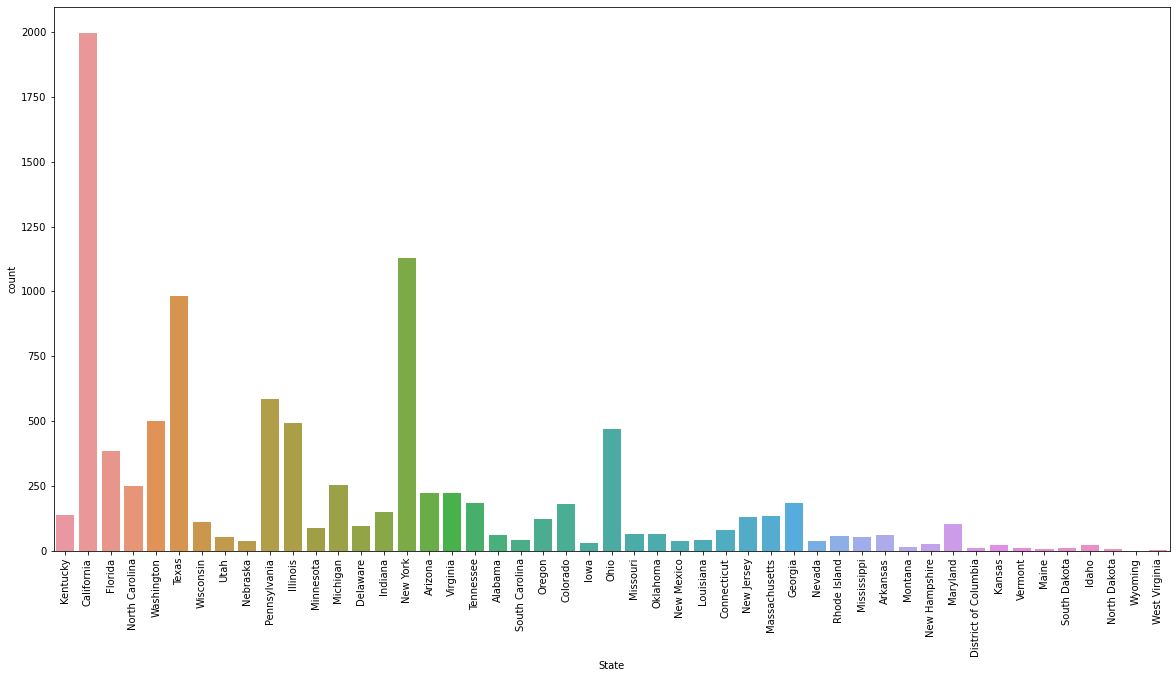

In [51]:
plt.figure(figsize=(20,10))
sns.countplot(df["State"])
plt.xticks(rotation=90)
plt.show()

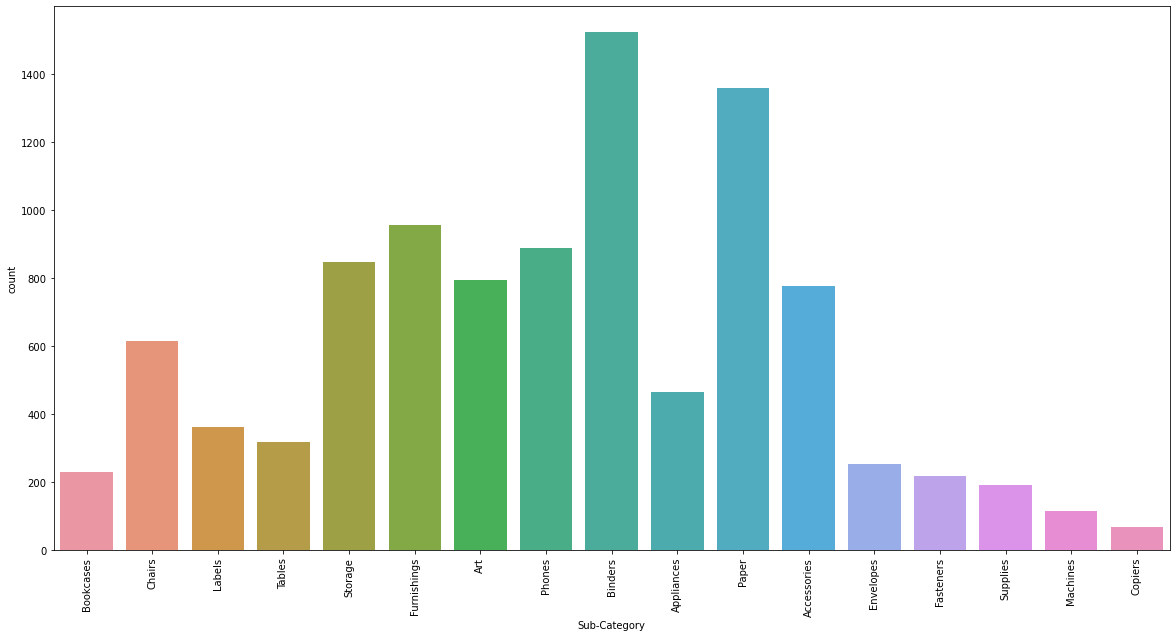

In [53]:
# plotting the data
plt.figure(figsize=(20,10))
sns.countplot(df["Sub-Category"])
plt.xticks(rotation=90)
plt.show()

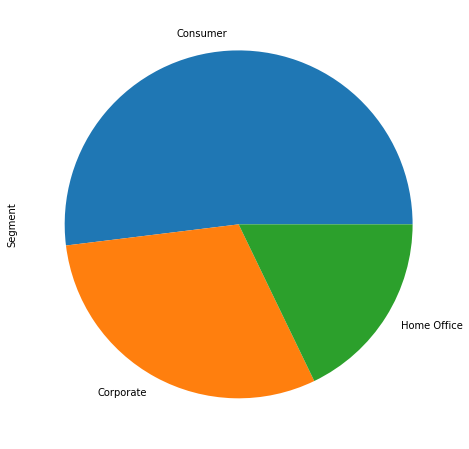

In [7]:
# let see pie chart
plt.figure(figsize=(8,8))
df['Segment'].value_counts().plot.pie()
plt.show()

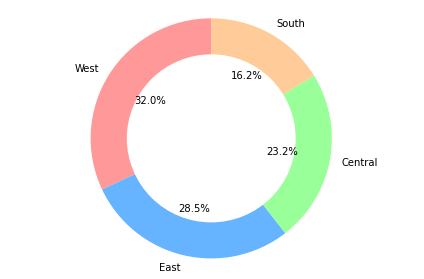

In [79]:
# Regionwise sales
colors = ['#ff9999','#66b3ff','#99ff99','#ffcc99']
fig1, ax1 = plt.subplots()
ax1.pie(df["Region"].value_counts(), colors = colors,labels=("West","East","Central","South"),autopct='%1.1f%%', startangle=90)
#draw circle
centre_circle = plt.Circle((0,0),0.70,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)
# Equal aspect ratio ensures that pie is drawn as a circle
ax1.axis('equal')  
plt.tight_layout()
plt.show()


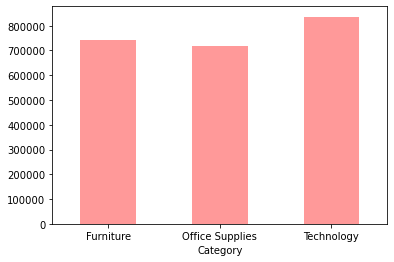

In [91]:
# Category wise sales
df.groupby('Category').Sales.sum().plot(kind= "bar",color="#ff9999")
plt.xticks(rotation=0)
plt.show()

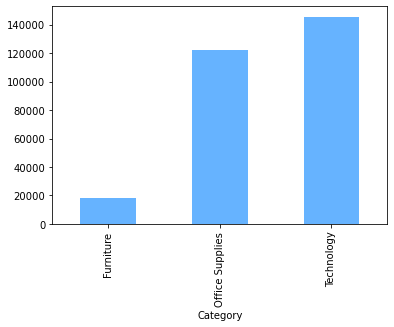

In [92]:
# Category wise profit
df.groupby('Category').Profit.sum().plot(kind= "bar",color="#66b3ff")
plt.show()

<ipython-input-103-732061235828>:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  Sales_Pro = df.groupby(['Category'])['Sales','Profit'].agg(['sum'])


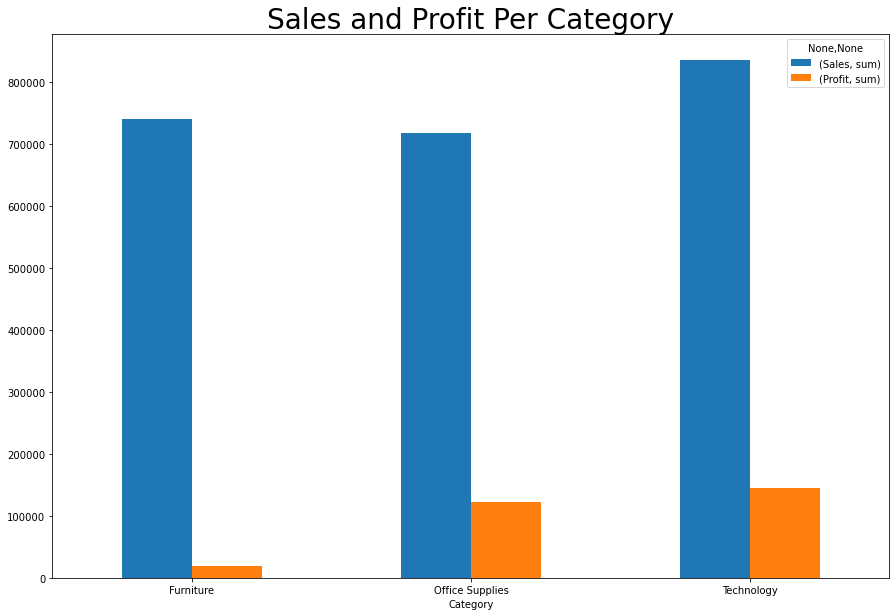

In [103]:
# Sales and Profit Per Category
Sales_Pro = df.groupby(['Category'])['Sales','Profit'].agg(['sum'])
Sales_Pro.plot.bar(rot=0,figsize=(15,10))
plt.title("Sales and Profit Per Category",fontsize = 28)
plt.show()

In [ ]:
### Top 10 States sales

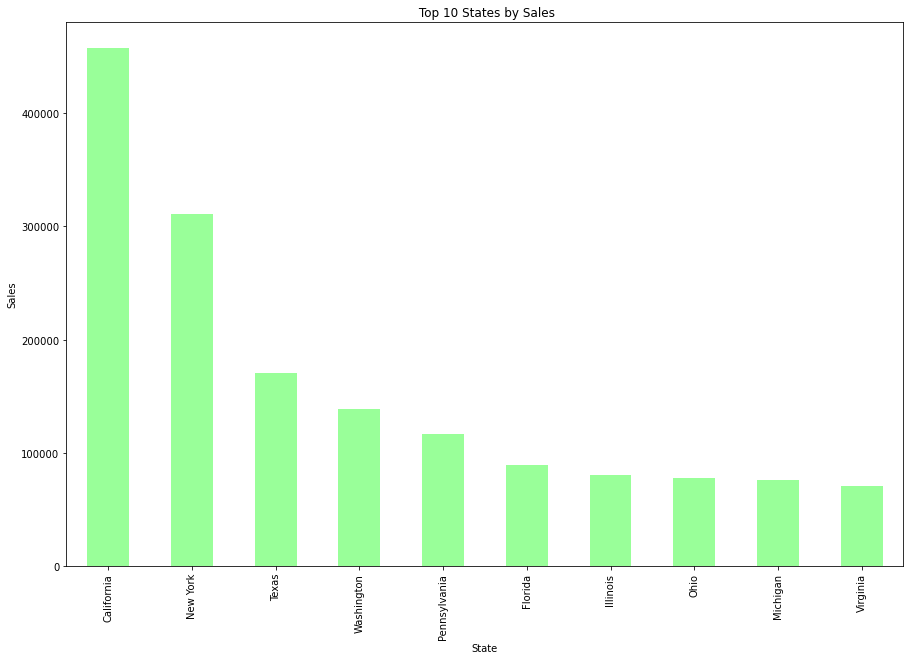

In [99]:
fgdf.groupby("State").Sales.sum().nlargest(n=10).plot(kind="bar",color="#99ff99",figsize=(15,10))
plt.xlabel("State")
plt.ylabel("Sales")
plt.title(" Top 10 States by Sales")
plt.show()

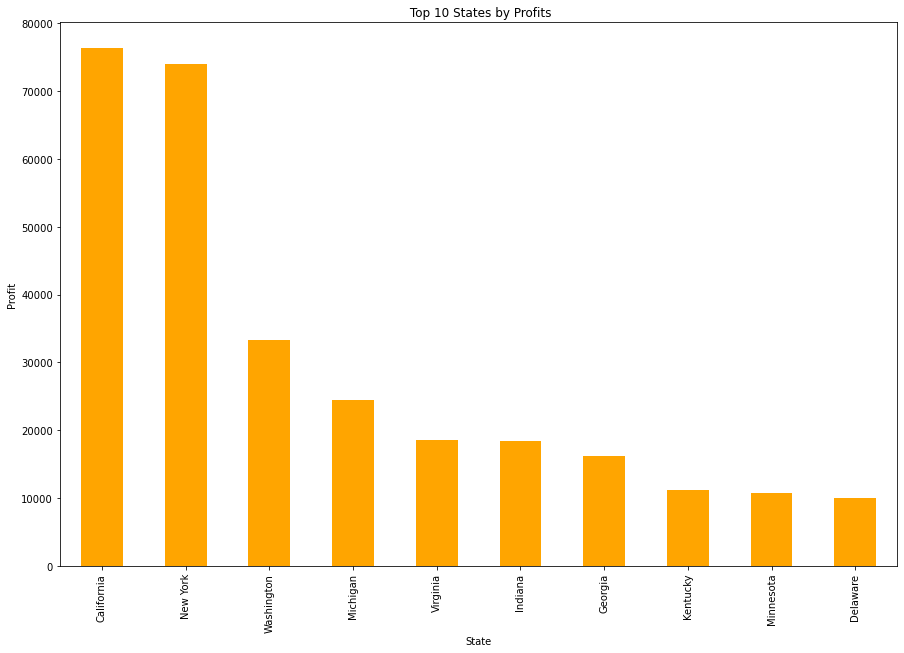

In [100]:
# Top 10 State Profit wise
df.groupby("State").Profit.sum().nlargest(n=10).plot(kind="bar",color="orange",figsize=(15,10))
plt.xlabel("State")
plt.ylabel("Profit")
plt.title(" Top 10 States by Profits")
plt.show()

 # Task Completed